In [1]:
#import required packages
import pandas as pd                   #for data analysis
import numpy as np                    #for mathematical operations on arrays
import seaborn as sns                 #for making statistical graphics
import matplotlib.pyplot as plt       #for creating static visualizations

In [2]:
#read the dataset and print out the first couple of rows
df = pd.read_csv('top_engineering_colleges_india.csv')
df.head()

,Unnamed: 0,rank,name,owner_ship,grade,TLR,RPC,go,oi,perc,total
0,0,1,IIT Madras - Indian Institute of Technology,Public/Government,AAAAA,94.62,97.66,80.42,62.85,100.0,90.04
1,1,2,IIT Delhi - Indian Institute of Technology,Public/Government,AAAAA,86.95,96.00,83.43,68.56,96.92,88.12
2,2,3,IIT Bombay - Indian Institute of Technology,Public/Government,AAAAA,87.53,90.82,79.18,57.36,88.7,83.96
3,3,4,IIT Kanpur - Indian Institute of Technology,Public/Government,AAAAA,87.95,79.98,89.71,59.47,83.01,82.56
4,4,5,IIT Kharagpur - Indian Institute of Technology,Public/Government,AAAAA,79.21,84.61,80.91,53.09,82.63,78.89


In [3]:
#here, we don't have any relavant information on column 0, thus, we drop that column
#axis=1 means we are droping columns
df=df.drop(['Unnamed: 0'], axis=1,)
df.shape

(200, 10)

In [4]:
#we have 200 rows of data, with 11 columns
#change column name 'owner_ship' to 'ownership' for readability
df.rename(columns={'owner_ship':'ownership'}, inplace=True)
df.columns

Index(['rank', 'name', 'ownership', 'grade', 'TLR', 'RPC', 'go', 'oi', 'perc',
       'total'],
      dtype='object')

In [5]:
#let's observe unique values in ownership
df.ownership.unique()

array(['Public/Government', 'Private'], dtype=object)

In [6]:
#let's observe unique values in grade
df.grade.unique()

array(['AAAAA', 'AAAA', 'none', 'AAA', 'AA'], dtype=object)

In [7]:
#convert the perc column to numeric
df['perc']=pd.to_numeric(df['perc'], errors='coerce')
#convert the total column to numeric
df['total']=pd.to_numeric(df['total'], errors='coerce')

### Features
___
1. rank - Ranking of college accroding to different parameters (0-200) : numeric

2. name - The name of the college

3. ownership - which organization owns the college (public/Government,private) : categorical

4. grade - grading of the college. higher number of 'A' represent better. ('AAAAA', 'AAAA', 'none', 'AAA', 'AA') : categorical

5. TLR (Teaching-learning resources) - resources used by teachers as learning aid to stimulate interest of learners (0-100) : numeric

6. RPC (Research and Professional Practice) - defines the satisfactory standard of the research and professional practices followed in the particular college (0-100) : numeric

7. GO (Graduation Outcome) - percentage of graduate students who are currently employed, continued with further studies, or are doing something else.

8. OI (Outreach and inclusivity) - consideres the number of students from other states or country, percentage of women students, and facility for physically challenged student. (0-100) : numeric

9. perc (peer perception) - measure of college perception in the market, stakeholder, facility etc. (0-100) : numeric

In [8]:
#let's examine the dataframe for null or missing values
df.isnull().sum()

rank         0
name         0
ownership    0
grade        0
TLR          0
RPC          0
go           0
oi           0
perc         4
total        4
dtype: int64

In [9]:
#we have 4 null values on total, to deal with this we take mean of total value of before and after college.
# for example, for college of rank: r, we take average total of r+1 and r-1 to replace the NaN.
nan_total_rows = df[df['total'].isna()];
for index, row in nan_total_rows.iterrows():
    # Calculate the average of the two adjacent colleges' "total" values
    before_total = df.iloc[index - 1]['total']
    after_total = df.iloc[index + 1]['total']
    avg_total = np.mean([before_total, after_total])
    # Replace the NaN value with the calculated average
    df.loc[index, 'total'] = avg_total

#we have 4 null values on perc, to deal with this we replace the NaN with mean value of column perc
mean_of_perc = df['perc'].mean();
df['perc'].fillna(mean_of_perc, inplace=True)

df.isnull().sum()

rank         0
name         0
ownership    0
grade        0
TLR          0
RPC          0
go           0
oi           0
perc         0
total        0
dtype: int64

In [10]:
#there might be outliers on our data sets, let's deal with it using winsorization

# define a list of column names to apply the winsorization to
columns_to_winsorize = ['TLR', 'RPC', 'go','oi','perc']

# loop through the list of column names and winsorize each column
for column_name in columns_to_winsorize:
    q1 = df[column_name].quantile(0.05)
    q4 = df[column_name].quantile(0.95)
    df[column_name] = np.clip(df[column_name], q1, q4)

<Axes: xlabel='ownership', ylabel='Count'>

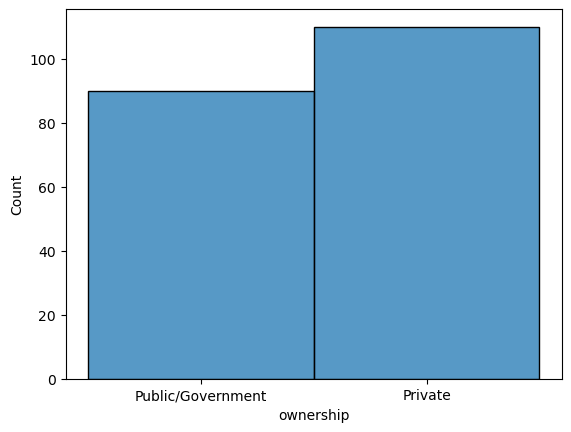

In [11]:
#question: How is the ownership of these college distributed?
#univariate graph of ownership to show distribution of ownership
sns.histplot(x='ownership', data=df)

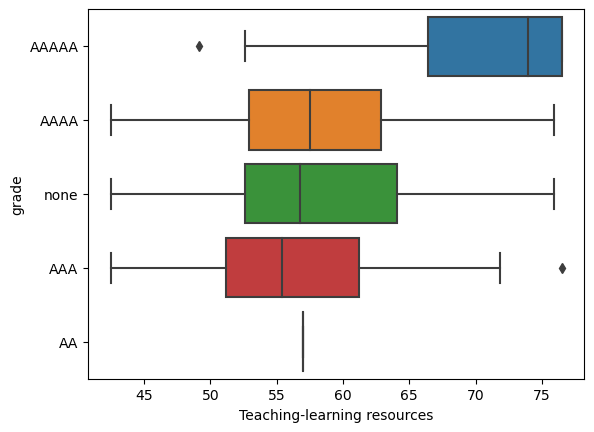

In [12]:
#question: Does better grading of college mean better teaching learning resources being used?
sns.boxplot(x='TLR',y='grade', data=df).set(xlabel='Teaching-learning resources')
plt.show()

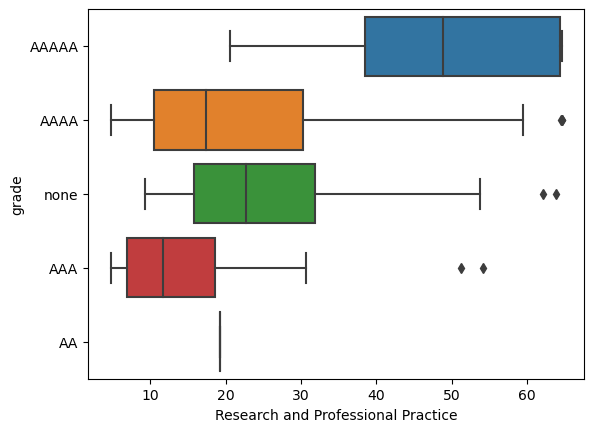

In [13]:
#question: Does better grading of college mean better research and professional practices being followed?
sns.boxplot(x='RPC',y='grade', data=df).set(xlabel='Research and Professional Practice')
plt.show()

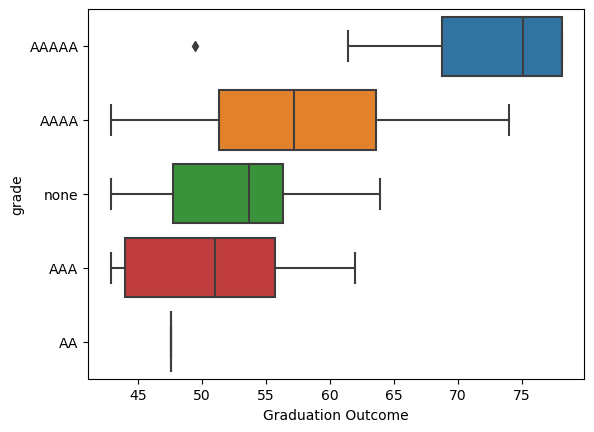

In [14]:
#question: Does better grading of college mean better graduation outcome?
sns.boxplot(x='go',y='grade', data=df).set(xlabel='Graduation Outcome')
plt.show()

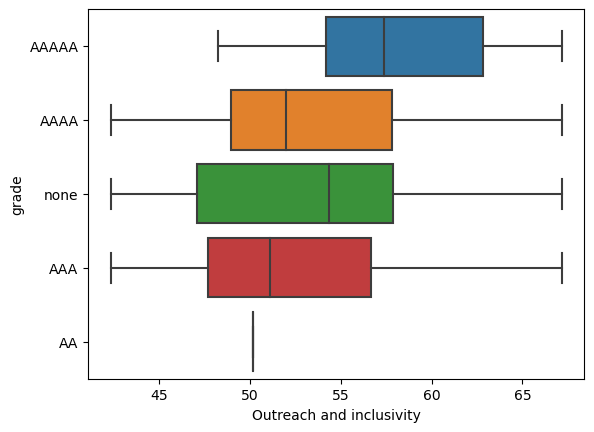

In [15]:
#question: Does better grading of college mean better outreach and inclusivity?
sns.boxplot(x='oi',y='grade', data=df).set(xlabel='Outreach and inclusivity')
plt.show()

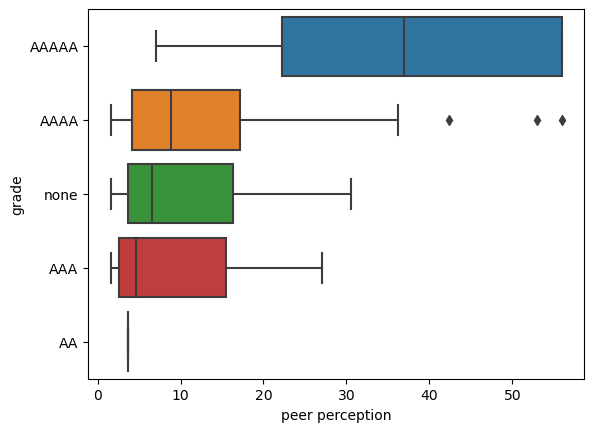

In [16]:
#question: Does better grading of college mean better peer perception?
sns.boxplot(x='perc',y='grade', data=df).set(xlabel='peer perception')
plt.show()

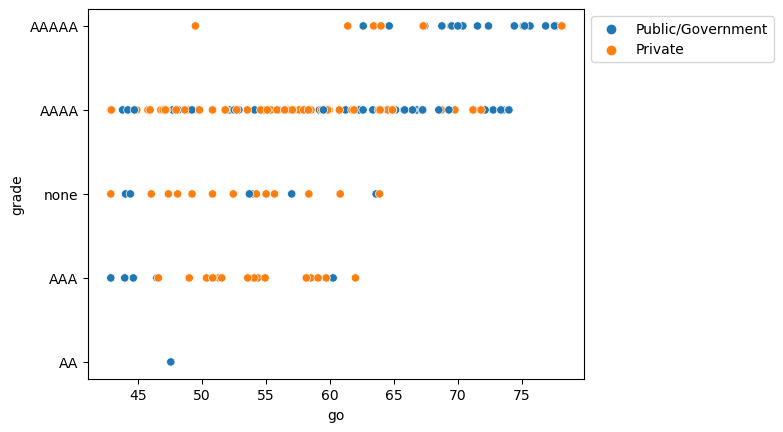

In [17]:
#question: Visualization of how graduate outcome depends on grade and ownership of the college.
sns.scatterplot(x='go',y='grade', hue='ownership', data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

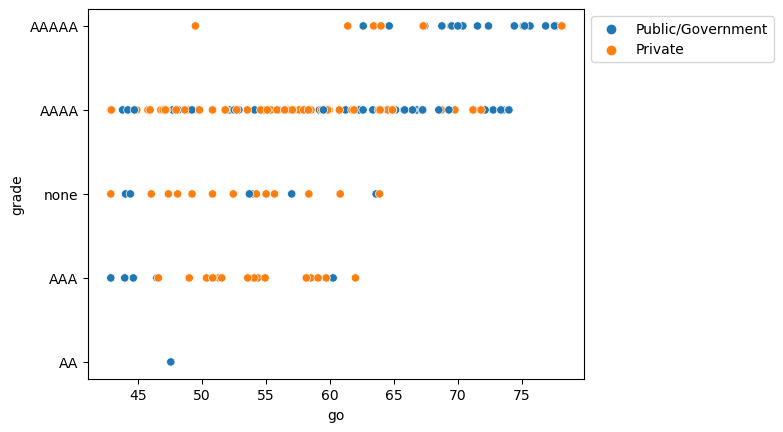

In [18]:
#question: Visualization of how research and professional practice depends on grade and ownership of the college.
sns.scatterplot(x='go',y='grade', hue='ownership', data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

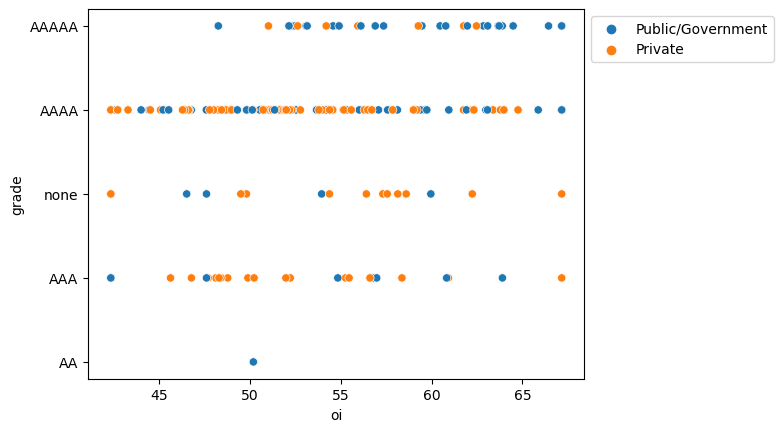

In [19]:
#question: Visualization of how outreach and inclusivity depends on grade and ownership of the college.
sns.scatterplot(x='oi',y='grade', hue='ownership', data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

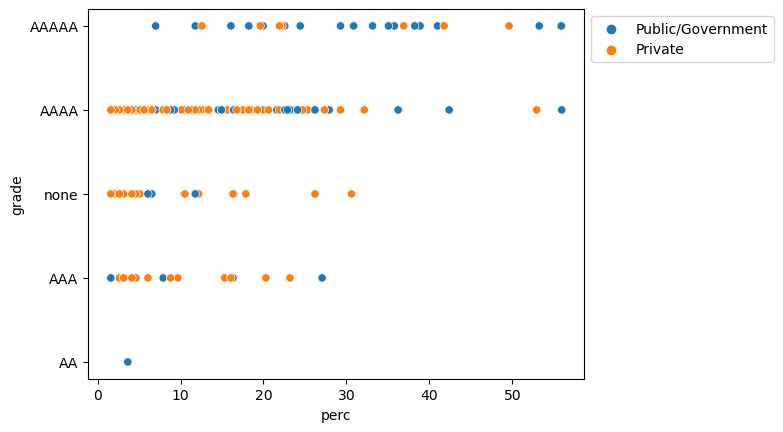

In [20]:
#question: Visualization of how peer perception depends on grade and ownership of the college.
sns.scatterplot(x='perc',y='grade', hue='ownership', data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

<Axes: >

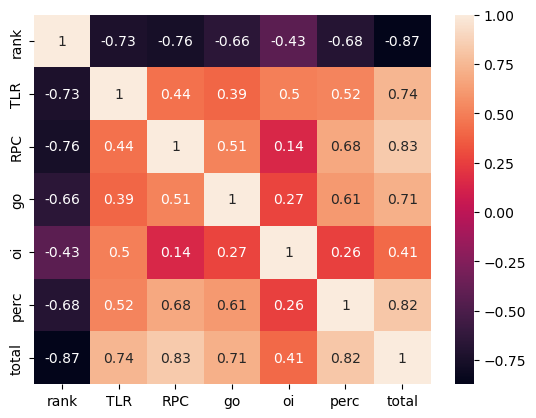

In [21]:
#identify corelation between numeric parameters of the dataset
corelation=df.corr(numeric_only=True)
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

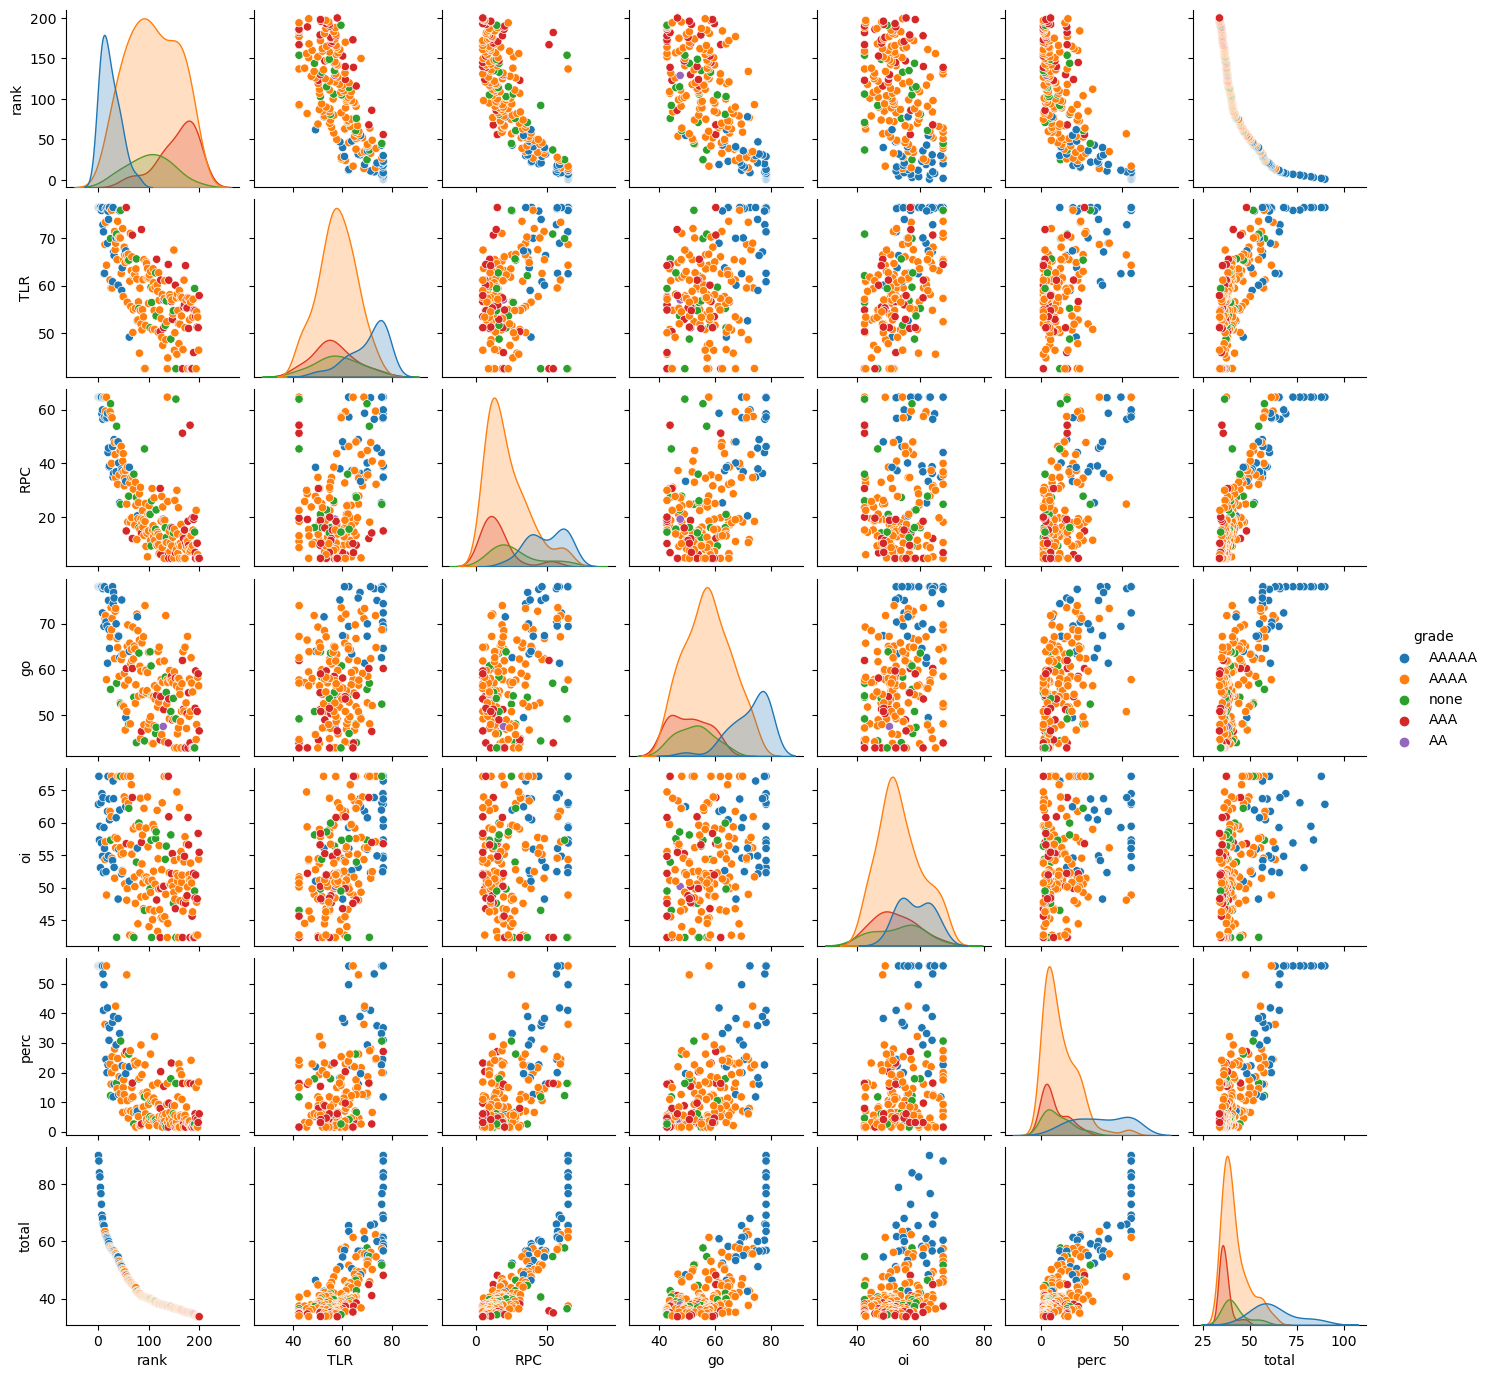

In [22]:
sns.pairplot(df,hue='grade',height=2)